In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
#plt.style.use('ggplot')


In [130]:
# ## 1. Data Analysis

# In[2]:


data = pd.read_csv(r'/content/1429_1.csv')
print("hhello kavya")


hhello kavya


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
data.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",great for beginner or experienced person. Bought as a gift and she loves it,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...",Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build 

In [132]:
data['brand'].unique()


array(['Amazon', 'Amazon Fire', 'Amazon Echo', 'Amazon Coco T',
       'Amazon Fire Tv', 'Amazon Digital Services Inc.'], dtype=object)

In [133]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [134]:
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [135]:
data.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

In [136]:
data.drop(['dateAdded','dateSeen','userCity','userProvince','username','sourceURLs','didPurchase'],axis=1,inplace=True)

In [137]:
# ## 2. Data Cleaning
data.isnull().sum()


id              0    
name            6760 
asins           2    
brand           0    
categories      0    
keys            0    
manufacturer    0    
date            39   
doRecommend     594  
id              34659
numHelpful      529  
rating          33   
text            1    
title           5    
dtype: int64

In [138]:
data.drop(labels=['id'],axis=1,inplace=True)

In [139]:
data.isnull().sum()

name            6760
asins           2   
brand           0   
categories      0   
keys            0   
manufacturer    0   
date            39  
doRecommend     594 
numHelpful      529 
rating          33  
text            1   
title           5   
dtype: int64

In [140]:
# ## 3. Data Visualization

# ### Customer Ratings Visualization


Rating distribution
5.0    23775
4.0    8541 
3.0    1499 
1.0    410  
2.0    402  
Name: rating, dtype: int64


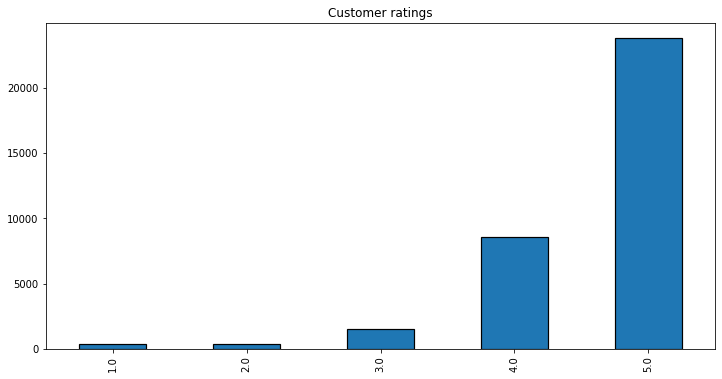

In [141]:
star = data['rating'].value_counts()
print("Rating distribution")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Customer ratings',figsize=(12,6),edgecolor='black',linewidth=1.2)


In [142]:
# ### Brands and their reviews visualizations


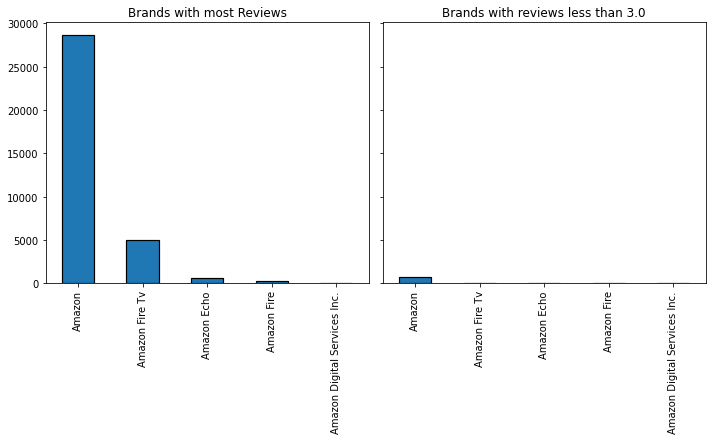

In [143]:
brands = data['brand'].value_counts()
brands_less_ratings = data[data['rating']<3.0]
brands_less_ratings = brands_less_ratings['brand'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222,sharex=ax, sharey=ax)
ax.set_title('Brands with most Reviews',color = 'black')
ax2.set_title('Brands with reviews less than 3.0',color = 'black')
brands.plot(kind='bar',edgecolor='black',linewidth=1.2,ax = ax, figsize=(10,10))
brands_less_ratings.plot(kind='bar',edgecolor='black',linewidth=1.2,ax = ax2,figsize=(10,10))
plt.tight_layout()
plt.show()


Most Reviewed Products
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                       10966
Echo (White),,,\r\nEcho (White),,,                                                                           3309 
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,    3176 
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                      2814 
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                       2527 
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                      1685 
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,                                    1038 
Name: name, dtype: int64


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


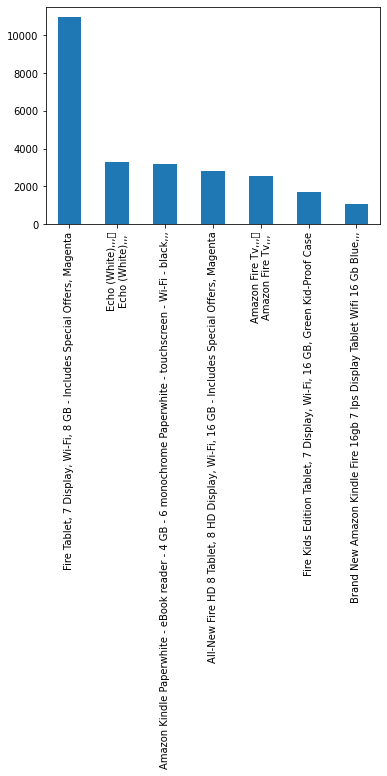

In [144]:
# ### Most reviewd/rated brand Visualization

# In[14]:


names = data['name'].value_counts()
names = names[names>1000]
print('Most Reviewed Products')
print(names)
names.plot(kind = 'bar')

In [145]:
# ## NPS Score
# Net Promoters Score(NPS) is a method to evaluate customer satisfaction and loyalty based on their ratings on the product they've purchased. 
# * Count Products with Ratings less than 3.0 - **Detractors**
# * Count Products with Rating = 4 - **Passive** 
# * Count Products with Ratings = 5 - **Promoter**
# 
# According to Recent Study:
# 
#     * NPS Score of Apple      : 72
#     * NPS Score of Netflix    : 68
#     * NPS Score of Starbucks* : 77
#    
# https://www.retently.com/blog/companies-high-nps/
#     
# #### Formula: 
# NPS = (Promoters - Detractors) / Total ratings * 100 

In [146]:

NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon from this dataset is : "  + str(NPS_score))


 NPS score of Amazon from this dataset is : 61.99


In [147]:
# ## 4. Product Data Analysis and Visualization


In [148]:
kindle = data[data.name=='Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,']


In [149]:
kindle.isnull().sum()

name            0
asins           0
brand           0
categories      0
keys            0
manufacturer    0
date            0
doRecommend     0
numHelpful      0
rating          0
text            0
title           0
dtype: int64

In [150]:
# ### Kindle Ratings Visualization

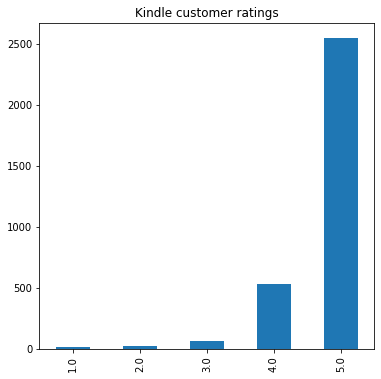

In [151]:
kindle_ratings = kindle['rating'].value_counts()
kindle_ratings.sort_index(inplace=True)
#better NPS than overall amazon
kindle_ratings.plot(kind='bar',title='Kindle customer ratings',figsize=(6,6),x='ratings',y='user_count')

In [152]:
Kindle_NPS_score = round (100*(kindle_ratings[5]-sum(kindle_ratings[1:3]))/sum(kindle_ratings),2)
print (" NPS score of Kindle is : "  + str(Kindle_NPS_score))

 NPS score of Kindle is : 77.08


In [153]:
# ### Kindle Recommendation suggestion from the dataset

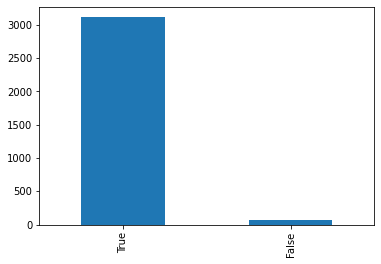

In [154]:
rec = kindle.doRecommend.value_counts()
rec.plot(kind = 'bar', style='Solarize_Light2')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed222d1d68>,
      dtype=object)

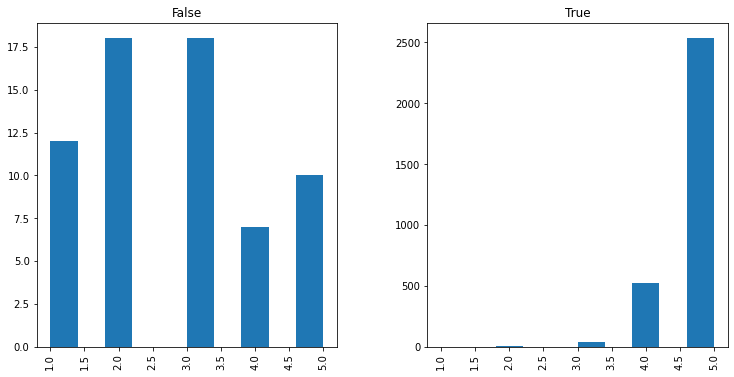

In [155]:
kindle.rating.hist(by=kindle.doRecommend,figsize=(12,6))

In [156]:
# ### NPS Score for the Product

In [157]:
plus_kindle = kindle[kindle.doRecommend==True].rating.value_counts()
plus_kindle.sort_index(inplace=True)
recomm_NPS = round(100*(sum(plus_kindle[4:5])-sum(plus_kindle[1:2]))/sum(plus_kindle),2)
minus_kindle = kindle[kindle.doRecommend==False].rating.value_counts()
minus_kindle.sort_index(inplace=True)
notrecomm_NPS = round(100*(sum(minus_kindle[4:5])-sum(minus_kindle[1:2]))/sum(minus_kindle),2)
print("Those who recommend amazon kindle generate high NPS score of " + str(recomm_NPS))
print("Those who DO NOT recommend kindle produce a NPS score of " + str(notrecomm_NPS))
print(" ~ pretty much correct definition of NPS score")

Those who recommend amazon kindle generate high NPS score of 98.23
Those who DO NOT recommend kindle produce a NPS score of -20.0
 ~ pretty much correct definition of NPS score


In [158]:
# ### Month wise analysis over the Kindle Product

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


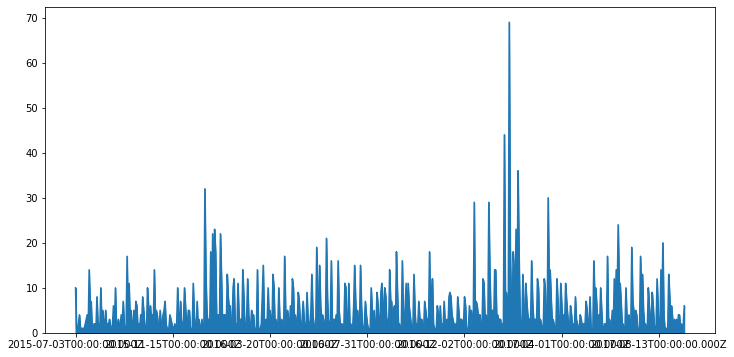

In [159]:
kindle['temp'] = kindle.date.apply(lambda x : pd.to_datetime(x))
kindle_review_dates = kindle.date.value_counts()
kindle_review_dates.sort_index(inplace=True)
kindle_review_dates.plot(kind='area',figsize=(12,6))

In [160]:
rating_perdate = kindle_review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:20]
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()



1     8
12    3
6     2
10    1
9     1
8     1
7     1
5     1
3     1
2     1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed221d5208>]],
      dtype=object)

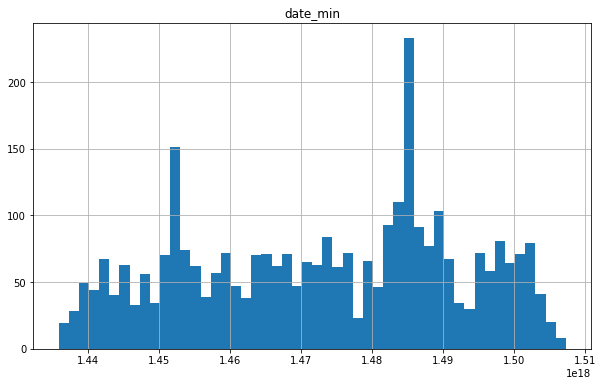

In [161]:
rating_series = pd.DataFrame(kindle.date)
dforms=[]
for x in rating_series.date:
    dforms.append((pd.to_datetime(x)).value)
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms)
rating2.reset_index(inplace=True)
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
rating2.hist(column='date_min', bins=50,figsize=(10,6))

In [162]:
# ### Function to generate NPS Score


In [163]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)    


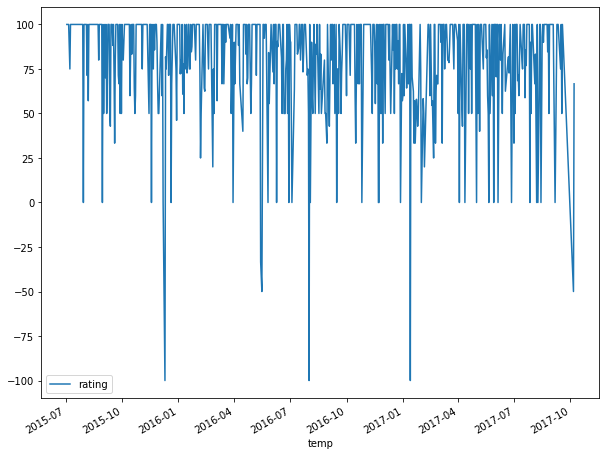

In [164]:

NPS_overtime = kindle[['temp','rating']]
NPS_overtime.groupby(by='temp').agg(NPS_eval).plot(figsize=(10,8))

In [165]:
def recommended_products():
    recomm = data[(data['categories']==prod_cat[0])|(data['categories']==prod_cat[1]) & (data['rating']>=4.0)]
    recomm = recomm['name'].unique()
    a = []
    i = 0
    for i in recomm:
        x = clean_lemma(i)
        a.append(x)
    for i in range(len(a)):
        a[i] = ' '.join(a[i])
    recomm = a
    return recomm

In [166]:
# ### Customer Sentiment Analysis among the dataset

In [167]:
comments = pd.concat([kindle['text']+". "+ kindle['title'],kindle['rating'],kindle['doRecommend']],axis=1)
comments.columns=['text','rating','recommend']

In [168]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [169]:

import string
import nltk
from nltk import PorterStemmer
import re 
stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()
def clean_stem (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3
def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3


In [170]:
# ### Stemming and Lemming
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))

Stemmed - 3693
Lemmatized - 4547


In [172]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,nice,littl,set,slow,wish,would,investig,jump,like,long,app,download,leav,wifi,work,great,road,trip,hunt,gift,8,year,old,daughter,kid,grandkid,love,3,one,bought,case,ok,tablet,android,play,store,weak,micro,usb,port,...,amzon,rader,beauiful,war,shove,cat,snugli,dat,fantasticli,uc,irvinedisplay,wellfew,iam,supper,dooper,rise,medic,visa,yourbedm,cartridg,itgot,syllabu,readingseasi,worker,desk,center,risk,season,retail,rice,git,vovag,sinpl,purpl,write,optioni,blackveri,onesveri,reliab,glich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)

,sum_scores_TFIDF
nice,4.242392
littl,0.338632
set,0.515145
slow,4.349600
wish,4.576738
would,3.383977
investig,0.990953
jump,0.179253
like,0.145790
long,0.381124


In [174]:
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:10] 

,sum_scores_TFIDF
gripe,0.076083
grandkid,0.076083
old,0.076083
cow,0.076083
felt,0.076083
max,0.076083
recomend,0.076083
unexpect,0.076083
amazon,0.076083
orang,0.076083


In [175]:
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
fool,217.397630
summer,209.501804
matt,198.910788
lighter,181.218969
purs,147.851506


In [176]:
pd.set_option('display.max_colwidth', 0)
comments.head()

,text,rating,recommend
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True


In [177]:
# ## 5. Sentiment Analysis# ## 5. Sentiment Analysis

In [178]:
  >>> import nltk
  >>> nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [179]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [180]:
from textblob import TextBlob 

In [181]:
def Sentiment(x):
    return TextBlob(x).sentiment

In [182]:
comments['Sentiment']= comments['text'].apply(lambda x : Sentiment(x))
comments['length'] = comments['text'].apply(lambda x : len(re.split('\W+',x)))
comments[comments['rating']==5].head(10)
test = 'oops'
print('Word is', test, sid.polarity_scores(test))
test = 'happy'
print('Word is', test, sid.polarity_scores(test))
test = 'my god'
print('Word is', test, sid.polarity_scores(test))
test = 'sigh'
print('Word is', test, sid.polarity_scores(test))

def convert(x):
    if x==True:
        return 1
    else :
        return 0
comments['target_rec'] = comments['recommend'].apply(lambda x : convert(x))
comments.head(5)

comments[comments['rating']==1].head(5)



Word is oops {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Word is happy {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
Word is my god {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732}
Word is sigh {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.0258}


,text,rating,recommend,Sentiment,length,target_rec
17220,This product wouldn't turn on nor charge and then store couldn't locate another one for me.. Product Issues,1.0,False,"(0.0, 0.0)",20,0
17423,"Would not take a charge, good thing i tried before wrapping it for Christmas.. Had to return this on Christmas eve day",1.0,False,"(0.7, 0.6000000000000001)",22,0
17443,"I didon't care for this tablet, downloading apps outside of Amazon was really confusing.. Don't like...too hard to download other apps",1.0,False,"(-0.17916666666666667, 0.3416666666666667)",24,0
17729,"I am really disappointed in this Kindle....I have had many kindles, but I wanted somwthing I thoughtnwould be simple. This kindle doesn't show all my books that are in my cloud..it doesn't matter that they aren't in my device but they should still show up in my cloud...I have to go to my amazon account and transfer the book I want to my device.. Great for someone who doesn't have alot of books",1.0,False,"(0.1375, 0.5892857142857143)",80,0
17887,Paper white does not allow you do use books from the library as you cannot load apps. Only books from Amazon are available to read.. Unable to access library,1.0,False,"(-0.024999999999999994, 0.475)",29,0


In [183]:
# ### Tweet analysis

In [184]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [185]:
class Twitter(object): 
    def __init__(self): 
        consumer_key = 'pTLTfvbyuGXYgIW0RNPL0repT'
        consumer_secret = 'aywF23Fi0XDsIwEugTECyeg4tAZLC8zS097s5jrZumdEHIRlW8'
        access_token = '2462629484-Y4krc7QdojpnWJlBoZ2GWtao2TUP9gnjNQ3jlqE'
        access_token_secret = 'hES7uWHi242wjRntARrusOboHKNfpQi0LGrUSJqkSqhHi'
        try: 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            self.auth.set_access_token(access_token, access_token_secret) 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
    def clean_tweet(self, tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
    def sentiment(self, tweet): 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
    def get_tweets(self, query, count = 10): 
        tweets = [] 
        try: 
            fetched_tweets = self.api.search(q = query, count = count) 
            for tweet in fetched_tweets: 
                parsed_tweet = {} 
                parsed_tweet['text'] = tweet.text 
                parsed_tweet['sentiment'] = self.sentiment(tweet.text) 
                if tweet.retweet_count > 0: 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
            return tweets 
        except tweepy.TweepError as e: 
            print("Error : " + str(e)) 

In [186]:
sent_name = kindle['name'].unique()
sent_name = sent_name[0].split()
sent_name = sent_name[:3]
sent_name = ' '.join(i for i in sent_name)
api = Twitter() 
tweets = api.get_tweets(query = sent_name, count = 200) 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
print("Neutral tweets percentage: {} % \ ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))



Positive tweets percentage: 19.35483870967742 %
Negative tweets percentage: 0.0 %
Neutral tweets percentage: 80.64516129032258 % \ 


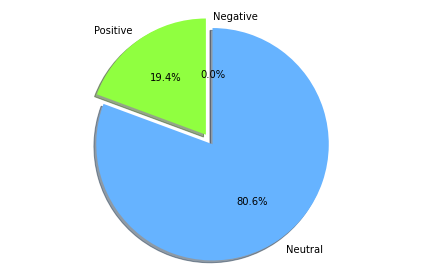

In [187]:
labels = ['Negative', 'Positive', 'Neutral']
pos = 100*len(ptweets)/len(tweets)
neg = 100*len(ntweets)/len(tweets)
neu = 100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)
sizes = [neg,pos,neu]
explode = (0, 0.1, 0)
colors = ['#ff9995','#90ff40','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()


In [188]:
# ## 6. Classifier

In [189]:
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
comments['sentiment']= comments['text'].apply(lambda x : sentiment(x))

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

new_sentiment = comments.sentiment.reset_index()['sentiment']

new_length = comments.length.reset_index()['length']

x_features = pd.concat([new_sentiment,new_length,pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features,comments.target_rec,test_size=0.2)
rf = RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=90)
rfmodel=rf.fit(x_train,y_train)

y_pred = rfmodel.predict(x_test)
sorted(zip(rfmodel.feature_importances_,x_train.columns),reverse=True)[10:]


[(0.007832555677527359, 'rightfirst'),
 (0.007775682879329658, 'cool'),
 (0.007632412712043023, 'oasi'),
 (0.00741512700200428, 'kndle'),
 (0.007319393777663795, 'reader3'),
 (0.006850308302367919, 'guard'),
 (0.006679068727014851, 'choic'),
 (0.006517683048365102, 'upper'),
 (0.006436323631318816, 'doesnot'),
 (0.0062336197048155914, 'summer'),
 (0.006202752643425266, 'hoop'),
 (0.00610518048705315, 'rough'),
 (0.005956847816883335, 'darkdim'),
 (0.005953844212227082, 'doghous'),
 (0.00590952374458084, 'dictionarydisplay'),
 (0.00590349865144255, 'zoom'),
 (0.005793583021122833, 'ebookwhich'),
 (0.0057549375493405755, 'histori'),
 (0.005679043120495043, 'cheaper'),
 (0.005678552554571401, 'evenli'),
 (0.00567274780814413, 'matt'),
 (0.005512120274685371, 'awayso'),
 (0.005358332259587844, 'keep'),
 (0.005286826683594095, 'paoerwhit'),
 (0.005239953369964812, 'surgeri'),
 (0.005195925728442004, 'sluggish'),
 (0.005160412754729139, 'ligth'),
 (0.005139282420272395, 'treat'),
 (0.0051365

In [191]:
precision, recall, fscore , support = score(y_test,y_pred,average='binary')
print('Precision: {}'.format(round(precision,3)))
print('Recall :{}'.format(round(recall,3)))
print('Accuracy {} '.format(round((y_pred==y_test).sum()/len(y_test),3)))

Precision: 0.978
Recall :1.0
Accuracy 0.978 


In [192]:
comments.info()
kindle.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3176 entries, 17214 to 20389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        3176 non-null   object 
 1   rating      3176 non-null   float64
 2   recommend   3176 non-null   object 
 3   Sentiment   3176 non-null   object 
 4   length      3176 non-null   int64  
 5   target_rec  3176 non-null   int64  
 6   sentiment   3176 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 358.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3176 entries, 17214 to 20389
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   name          3176 non-null   object             
 1   asins         3176 non-null   object             
 2   brand         3176 non-null   object             
 3   categories    3176 non-null   object             
 4   keys     

In [193]:
prod_name = kindle['name'].unique()
prod_name = prod_name[0]

In [194]:
prod_cat = kindle.categories[kindle['name'] == prod_name]
prod_cat = prod_cat.unique()

In [195]:
# ## 7. Recommendations

In [196]:
products = recommended_products()
j = 1
print('Close recommendations are:\n ')
for i in products:
    print(j,'.',i)
    j = j+1

Close recommendations are:
 
1 . fire hd 8 tablet alexa 8 hd display 32 gb tangerine special offer
2 . amazon 5w usb official oem charger power adapter fire tablet kindle ereaders amazon 5w usb official oem charger power adapter fire tablet kindle ereaders
3 . fire kid edition tablet 7 display wifi 16 gb green kidproof case
4 . amazon kindle paperwhite ebook reader 4 gb 6 monochrome paperwhite touchscreen wifi black
5 . kindle voyage ereader 6 highresolution display 300 ppi adaptive builtin light pagepress sensor wifi includes special offer
